<a href="https://colab.research.google.com/github/leeyeonho1001/DL/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 확인

In [2]:
# ds_train 과 ds_test 불러오기
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split = ['train', 'test'],
    as_supervised = True,
    with_info = True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteUKMY5K/rock_paper_scissors-train.tfrec…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteUKMY5K/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [3]:
# image의 shape와 dtype 확인
image_shape = ds_info.features['image'].shape
image_dtype = ds_info.features['image'].dtype
print(f'image shape : {image_shape}')
print(f'image dtype : {image_dtype}')

image shape : (300, 300, 3)
image dtype : <dtype: 'uint8'>


In [4]:
print(ds_info)

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir=PosixGPath('/tmp/tmpc41o1liftfds'),
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)


In [5]:
# class 정의
class_num = ds_info.features['label'].num_classes
class_names = ['rock','paper','scissors']

for i in range(class_num):
  print(i, class_names[i])

0 rock
1 paper
2 scissors


scissors


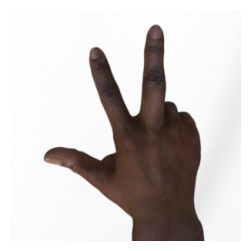

In [6]:
plt.figure(figsize = (3,3))
for (image, label) in ds_train.take(1):
  plt.imshow(image)
  plt.axis('off')
  print(class_names[label.numpy()])

scissors
scissors
rock
paper
rock
paper
scissors
paper


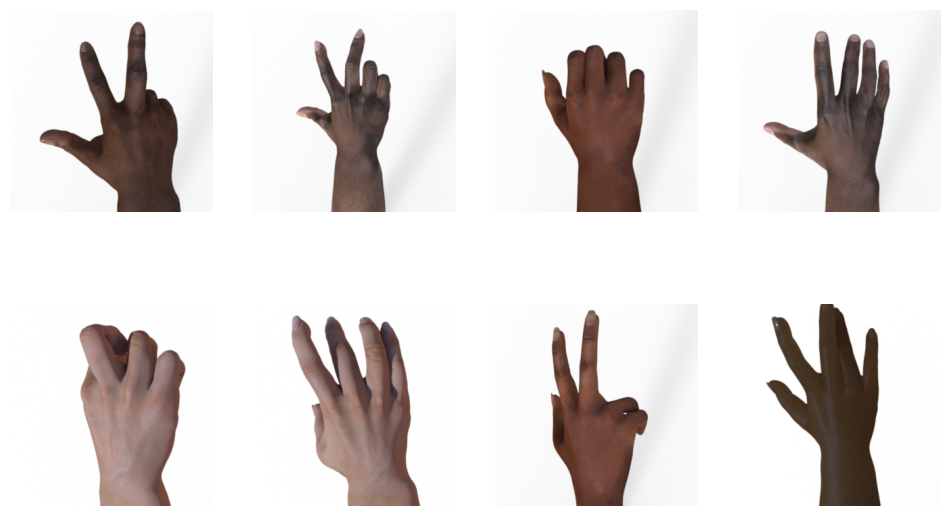

In [7]:
plt.figure(figsize = (12,7))
i = 1
for (image, label) in ds_train.take(8):
  plt.subplot(2,4,i)
  i += 1
  plt.axis('off')
  label = class_names[label.numpy()]
  print(f'{label}')
  plt.imshow(image)

# 데이터 전처리
[전처리 코드 참고](https://https://www.tensorflow.org/datasets/keras_example?hl=ko)

In [9]:
# image의 dtype을 실수로 바꾼 후 정규화
input_image_size = 100

def normalize_image(image, label):
  image = tf.cast(image, tf.float32)
  image = image / 255.
  image = tf.image.resize(image, [input_image_size, input_image_size])
  return image, label

In [10]:
# ds_train 과 ds_test 정규화
batch_size = 30

ds_train = ds_train.map(normalize_image, num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize_image,num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

# 모델 생성 및 학습

In [16]:
# CNN 모델 생성
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (input_image_size, input_image_size, 3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(class_num, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0

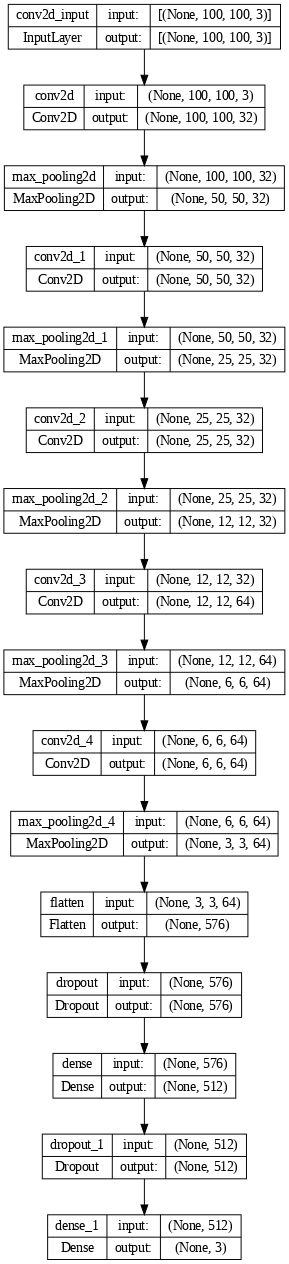

In [17]:
# layer shape 시각화
keras.utils.plot_model(model, show_shapes = True, dpi = 70)

In [20]:
# 모델 컴파일 및 훈련
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(ds_train, epochs = 30, validation_data = ds_test)

Epoch 1/30
84/84 [==============================] - 50s 515ms/step - loss: 1.0989 - accuracy: 0.3544 - val_loss: 1.0950 - val_accuracy: 0.3871
Epoch 2/30
84/84 [==============================] - 47s 557ms/step - loss: 1.0919 - accuracy: 0.3897 - val_loss: 1.0912 - val_accuracy: 0.5565
Epoch 3/30
84/84 [==============================] - 34s 402ms/step - loss: 1.0807 - accuracy: 0.4206 - val_loss: 1.0868 - val_accuracy: 0.5484
Epoch 4/30
84/84 [==============================] - 36s 424ms/step - loss: 1.0734 - accuracy: 0.4325 - val_loss: 1.0782 - val_accuracy: 0.7258
Epoch 5/30
84/84 [==============================] - 52s 621ms/step - loss: 1.0500 - accuracy: 0.4964 - val_loss: 1.0561 - val_accuracy: 0.5806
Epoch 6/30
84/84 [==============================] - 42s 498ms/step - loss: 0.9917 - accuracy: 0.5575 - val_loss: 0.9913 - val_accuracy: 0.6882
Epoch 7/30
84/84 [==============================] - 49s 586ms/step - loss: 0.8342 - accuracy: 0.6488 - val_loss: 0.8031 - val_accuracy: 0.6694

# 모델 평가

In [21]:
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test Loss : {test_loss}')
print(f'Test accuracy : {test_acc*100 : .2f}%')

13/13 [==============================] - 2s 174ms/step - loss: 0.3903 - accuracy: 0.9597
Test Loss : 0.39030545949935913
Test accuracy :  95.97%


# 예측

In [22]:
predictions = model.predict(ds_test)
print(predictions)

13/13 [==============================] - 2s 121ms/step
[[9.08450980e-04 9.40557569e-03 9.89685953e-01]
 [1.17481995e-05 9.99008477e-01 9.79616656e-04]
 [3.33143659e-02 1.13894021e-06 9.66684461e-01]
 ...
 [1.00000000e+00 3.62420742e-08 2.06698282e-14]
 [4.27353298e-05 4.86742318e-01 5.13214946e-01]
 [7.60739786e-05 8.38329136e-01 1.61594823e-01]]


        loss  accuracy  val_loss  val_accuracy  epoch
0   1.098868  0.354365  1.095011      0.387097      1
1   1.091888  0.389683  1.091234      0.556452      2
2   1.080716  0.420635  1.086801      0.548387      3
3   1.073352  0.432540  1.078248      0.725806      4
4   1.050003  0.496429  1.056115      0.580645      5
5   0.991699  0.557540  0.991289      0.688172      6
6   0.834162  0.648810  0.803052      0.669355      7
7   0.570035  0.777381  0.585192      0.819892      8
8   0.358786  0.869841  0.502916      0.809140      9
9   0.230210  0.922619  0.423214      0.833333     10
10  0.183456  0.940873  0.494392      0.798387     11
11  0.123639  0.961508  0.362222      0.870968     12
12  0.105341  0.969444  0.321310      0.967742     13
13  0.065753  0.984524  0.371632      0.911290     14
14  0.065314  0.983333  0.326698      0.954301     15
15  0.049905  0.985714  0.326219      0.967742     16
16  0.044591  0.985714  0.279327      0.970430     17
17  0.034431  0.992460  0.29

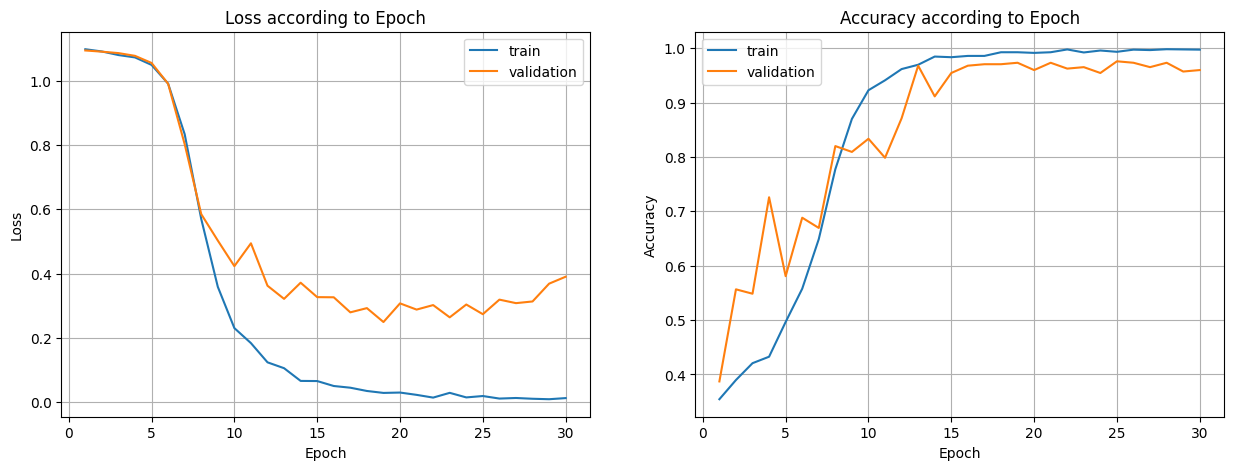

In [28]:
# 시각화
import pandas as pd
import matplotlib.pyplot as plt

df_hist = pd.DataFrame(hist.history)
df_hist['epoch'] = range(1, 31)
print(df_hist)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(df_hist['epoch'],df_hist['loss'],label = 'train')
plt.plot(df_hist['epoch'],df_hist['val_loss'],label = 'validation')
plt.title('Loss according to Epoch')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(df_hist['epoch'], df_hist['accuracy'], label = 'train')
plt.plot(df_hist['epoch'], df_hist['val_accuracy'], label = 'validation')
plt.title('Accuracy according to Epoch')
plt.grid(True)
plt.legend()

plt.show()